## CNN卷积神经网络

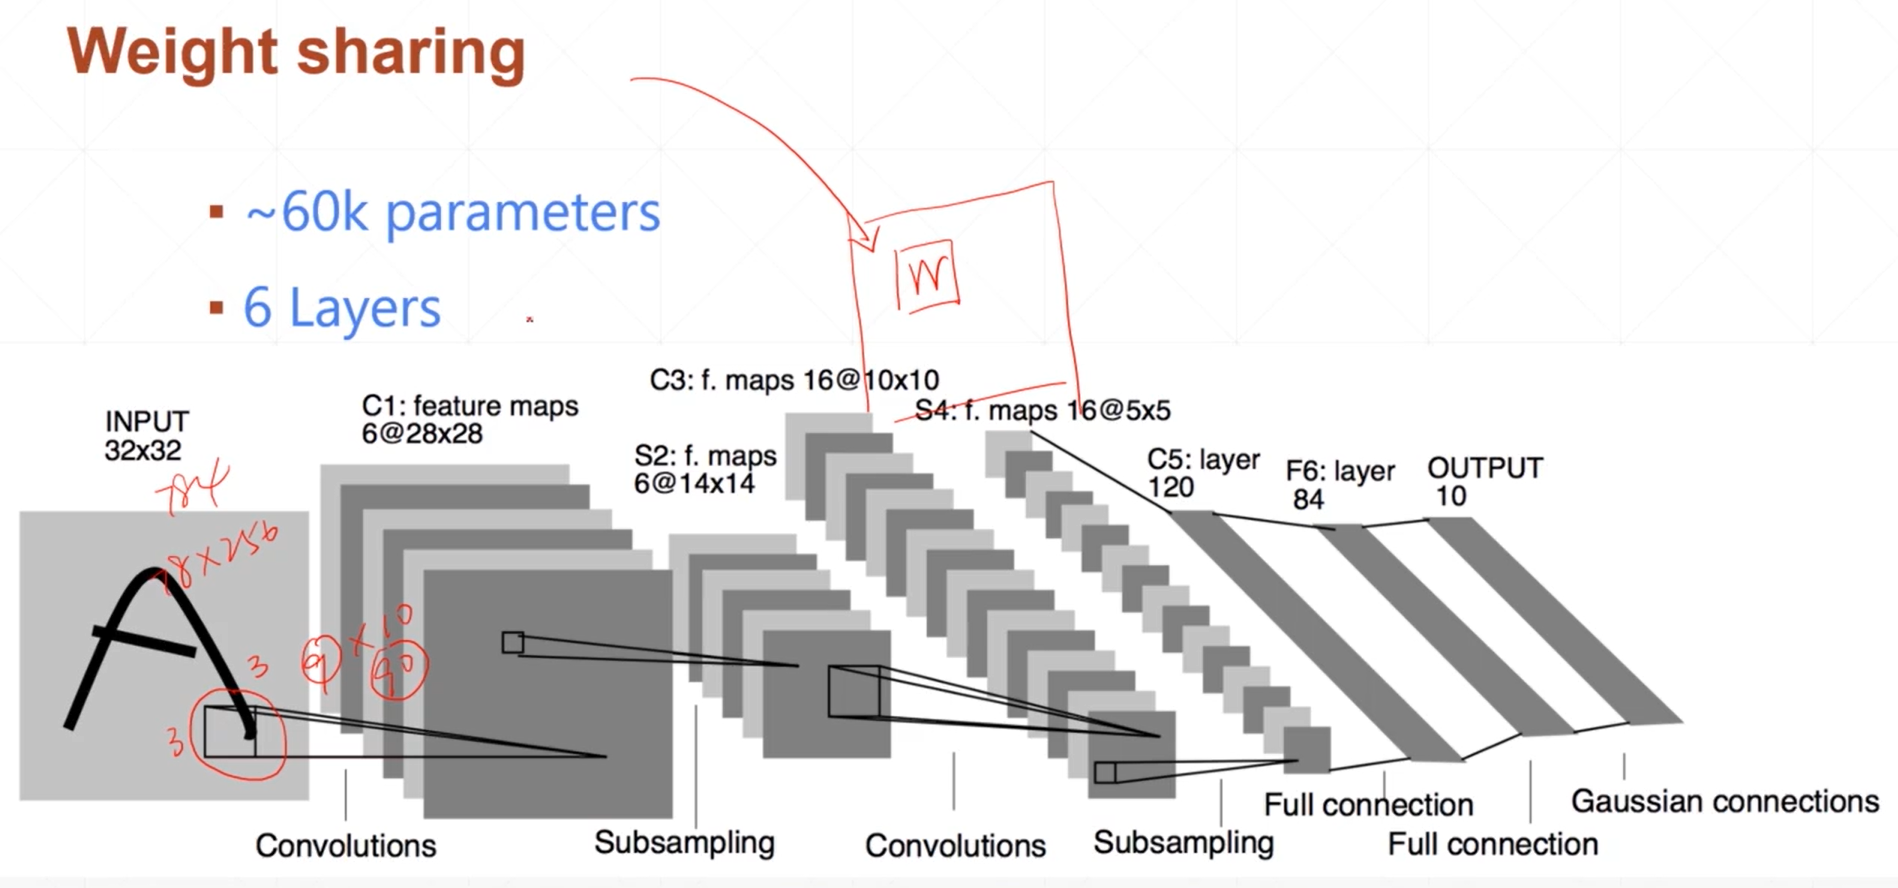

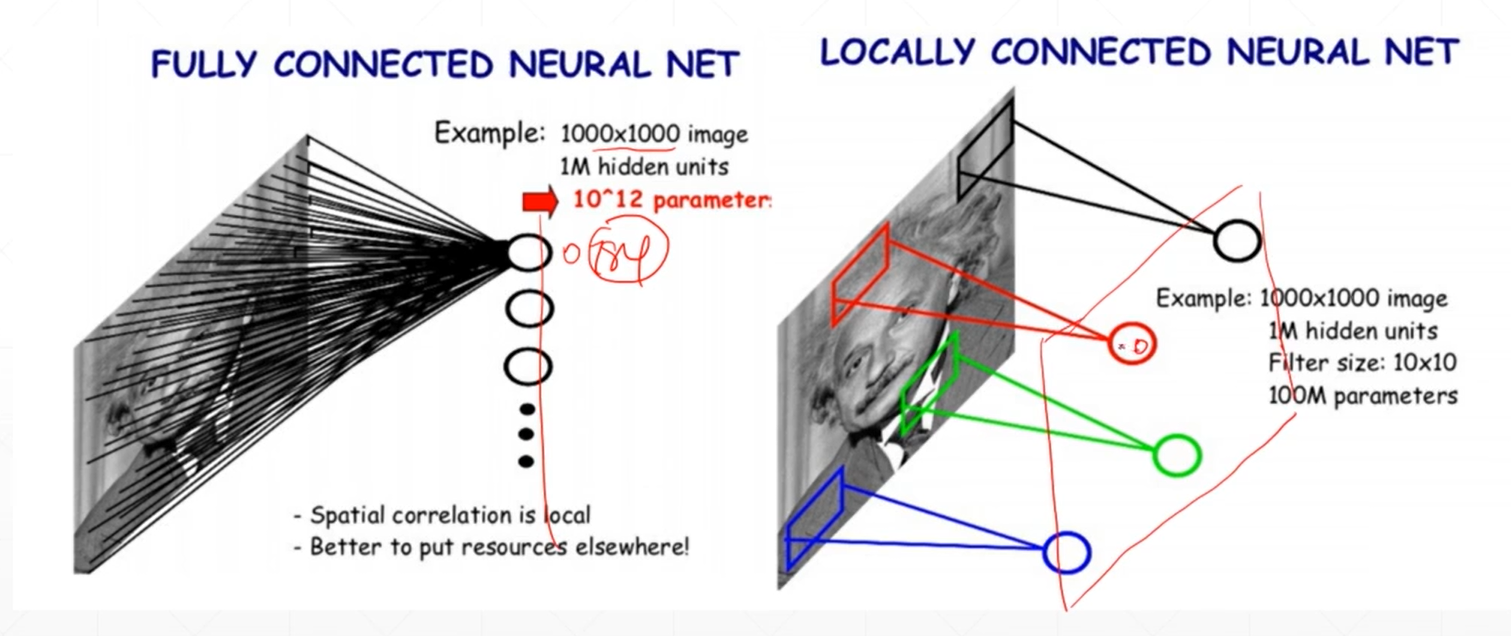

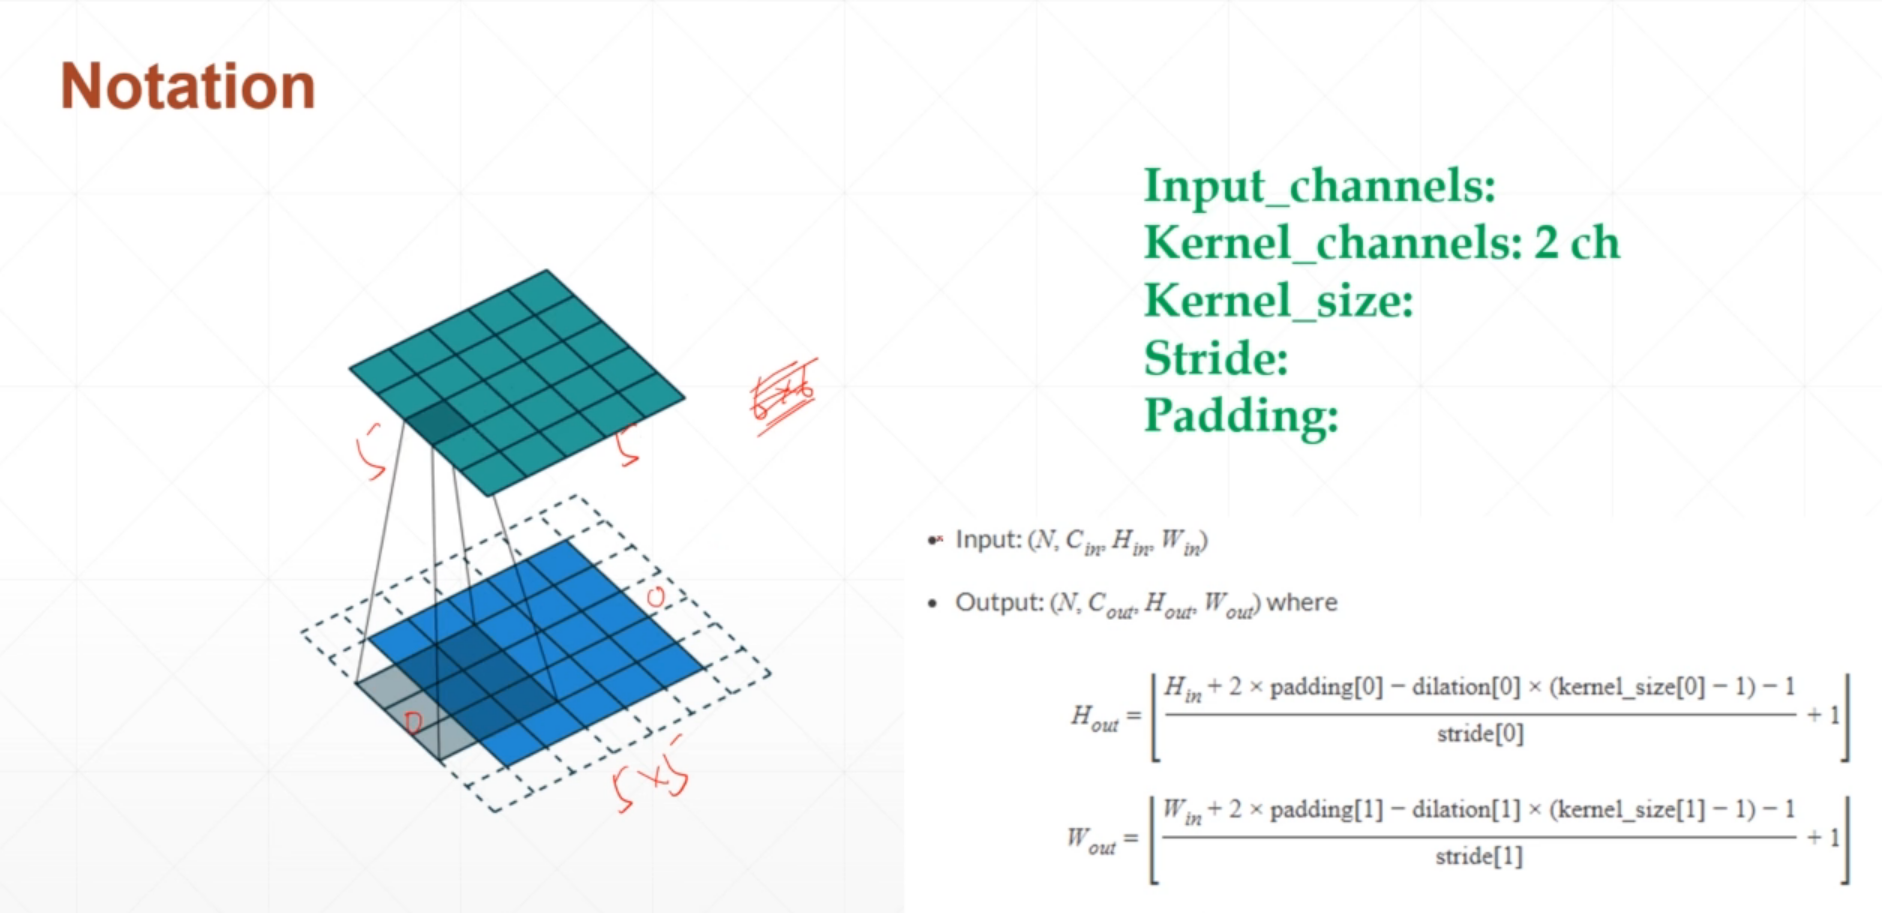

In [28]:
import torch
from torch import nn
from torch.nn import functional as F

In [5]:
layer = nn.Conv2d(1,3,kernel_size = 3,stride = 1,padding =0)

In [7]:
x = torch.rand(1,1,28,28)
out = layer.forward(x)
out.size()

torch.Size([1, 3, 26, 26])

In [16]:
layer = nn.Conv2d(1,3,kernel_size = 3,stride = 1,padding =1)

In [17]:
x = torch.rand(1,1,28,28)
out = layer.forward(x)
out.size()

torch.Size([1, 3, 28, 28])

In [20]:
layer = nn.Conv2d(1,3,kernel_size = 3,stride = 2,padding =1)

In [21]:
x = torch.rand(1,1,28,28)
out = layer.forward(x)
out.size()

torch.Size([1, 3, 14, 14])

In [24]:
out = layer(x) #这里也可以直接用实例化后的方法
out.size()

torch.Size([1, 3, 14, 14])

In [25]:
layer.weight

Parameter containing:
tensor([[[[-0.0108,  0.0134, -0.1067],
          [-0.2230,  0.0355,  0.1250],
          [ 0.0605,  0.1487,  0.3271]]],


        [[[ 0.1852,  0.0587, -0.0974],
          [ 0.2006, -0.1572,  0.3294],
          [ 0.1086, -0.2193, -0.0600]]],


        [[[ 0.0787, -0.1741, -0.2533],
          [-0.0457,  0.2745,  0.2579],
          [ 0.0843,  0.0593, -0.2809]]]], requires_grad=True)

In [26]:
layer.weight.shape

torch.Size([3, 1, 3, 3])

In [33]:
w = torch.rand(16,3,5,5)
b = torch.rand(16)


In [38]:
out = F.conv2d(x,w,b,stride = 1,padding =1)

In [39]:
x = torch.randn(1,3,28,28)

In [42]:
out = F.conv2d(x,w,b,stride = 1,padding =1)
out.size()

torch.Size([1, 16, 26, 26])

In [43]:
out = F.conv2d(x,w,b,stride = 2,padding =2)
out.size()

torch.Size([1, 16, 14, 14])

## 池化层

### 下采样

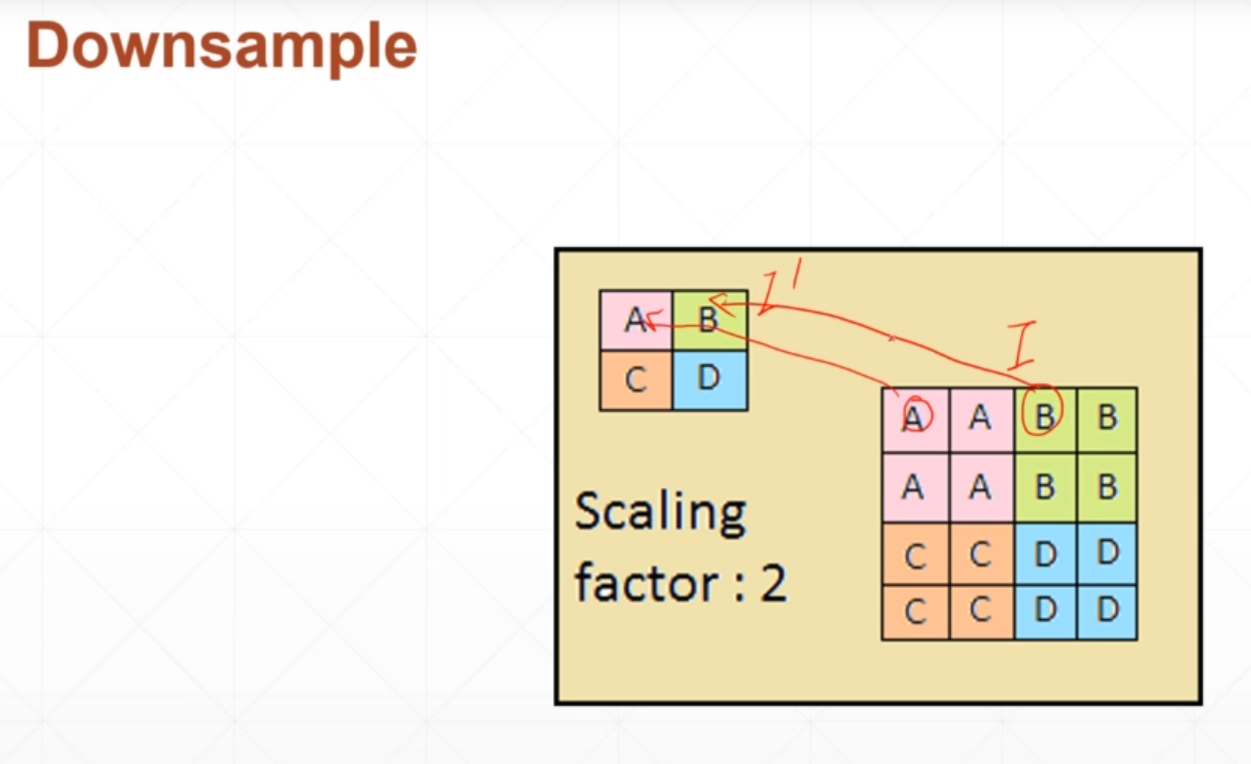

## 池化层

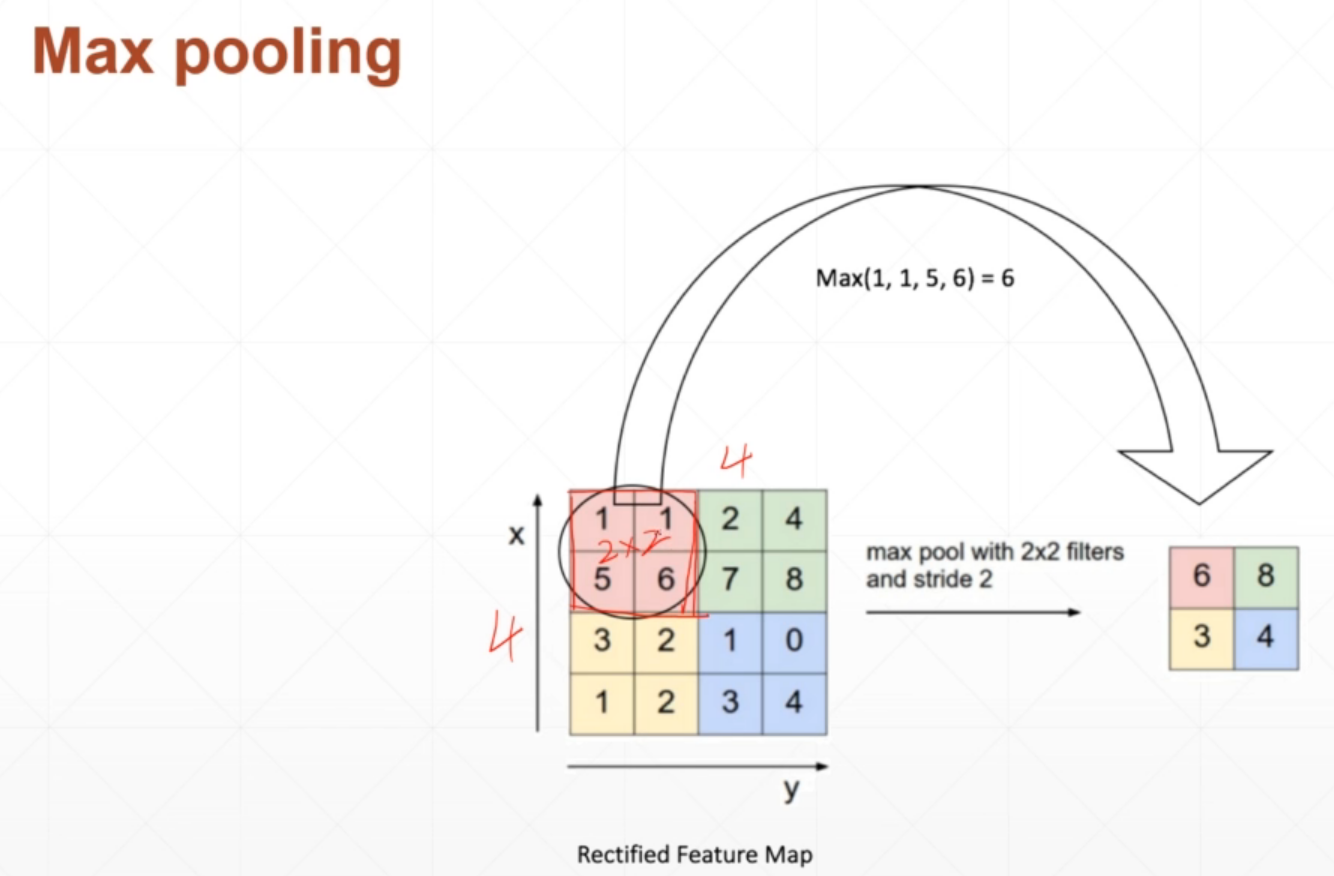

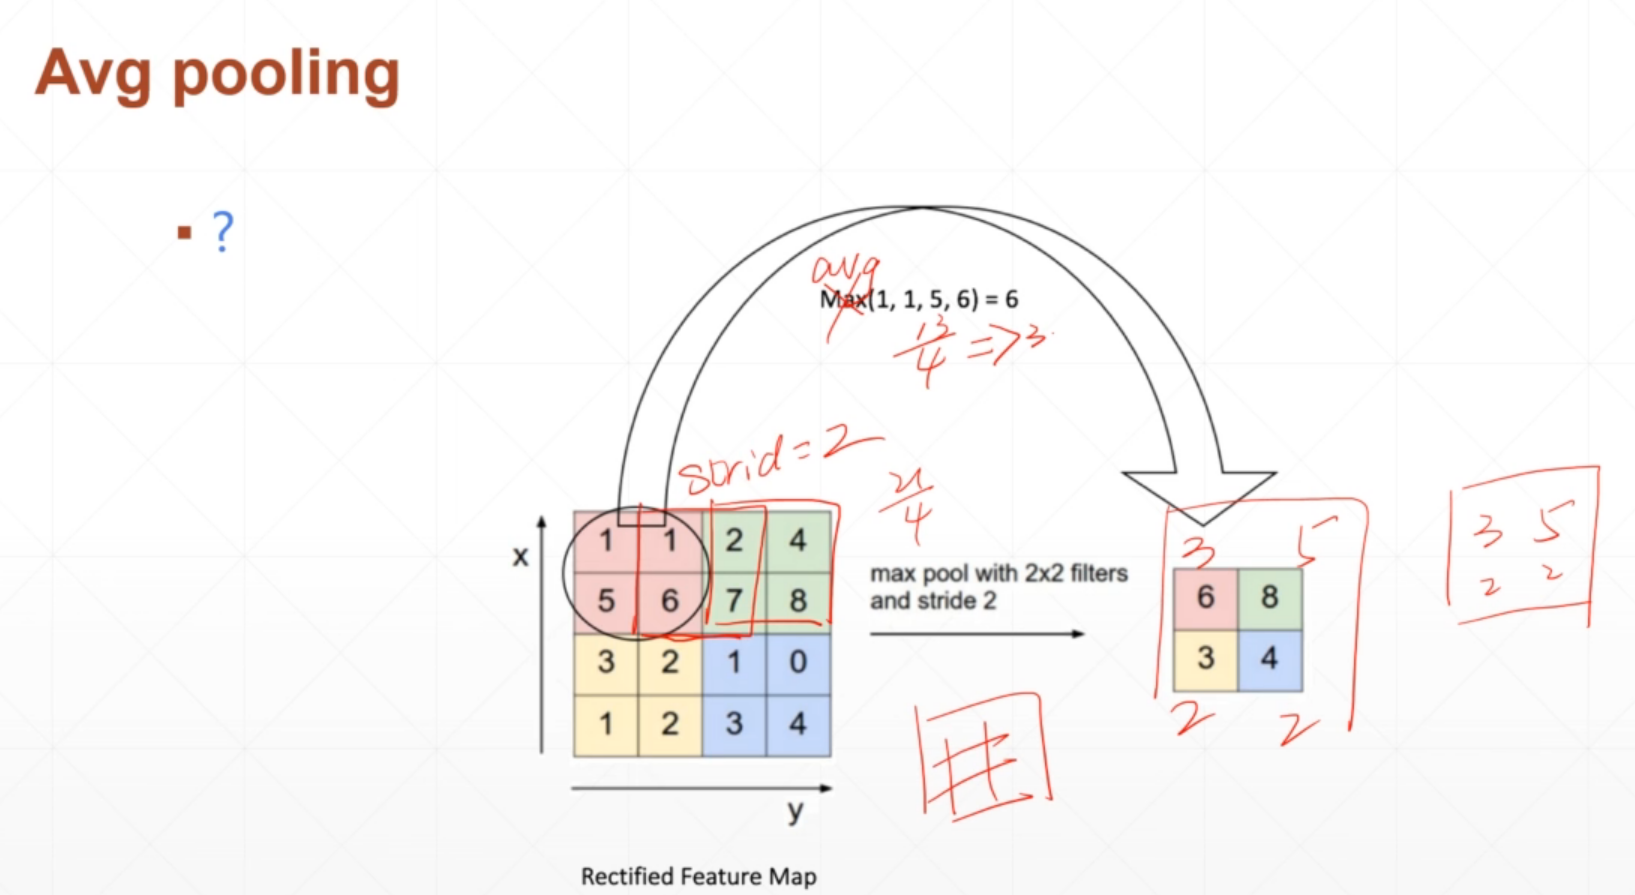

In [44]:
x = torch.randn(1,16,14,14)

In [45]:
layer = nn.MaxPool2d(2,stride = 2)
out = layer(x)
out.size()

torch.Size([1, 16, 7, 7])

In [48]:
out = F.avg_pool2d(x,2,stride =2)
out.size()

torch.Size([1, 16, 7, 7])

### 向上采样

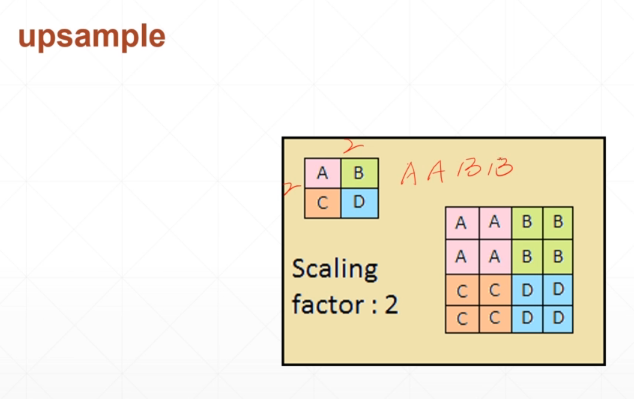

In [52]:
x = out
x.shape

torch.Size([1, 16, 7, 7])

In [53]:
out = F.interpolate(x,scale_factor=2,mode ='nearest') #这里是放大两倍
out.shape

torch.Size([1, 16, 14, 14])

In [54]:
out = F.interpolate(x,scale_factor=3,mode ='nearest')
out.shape

torch.Size([1, 16, 21, 21])

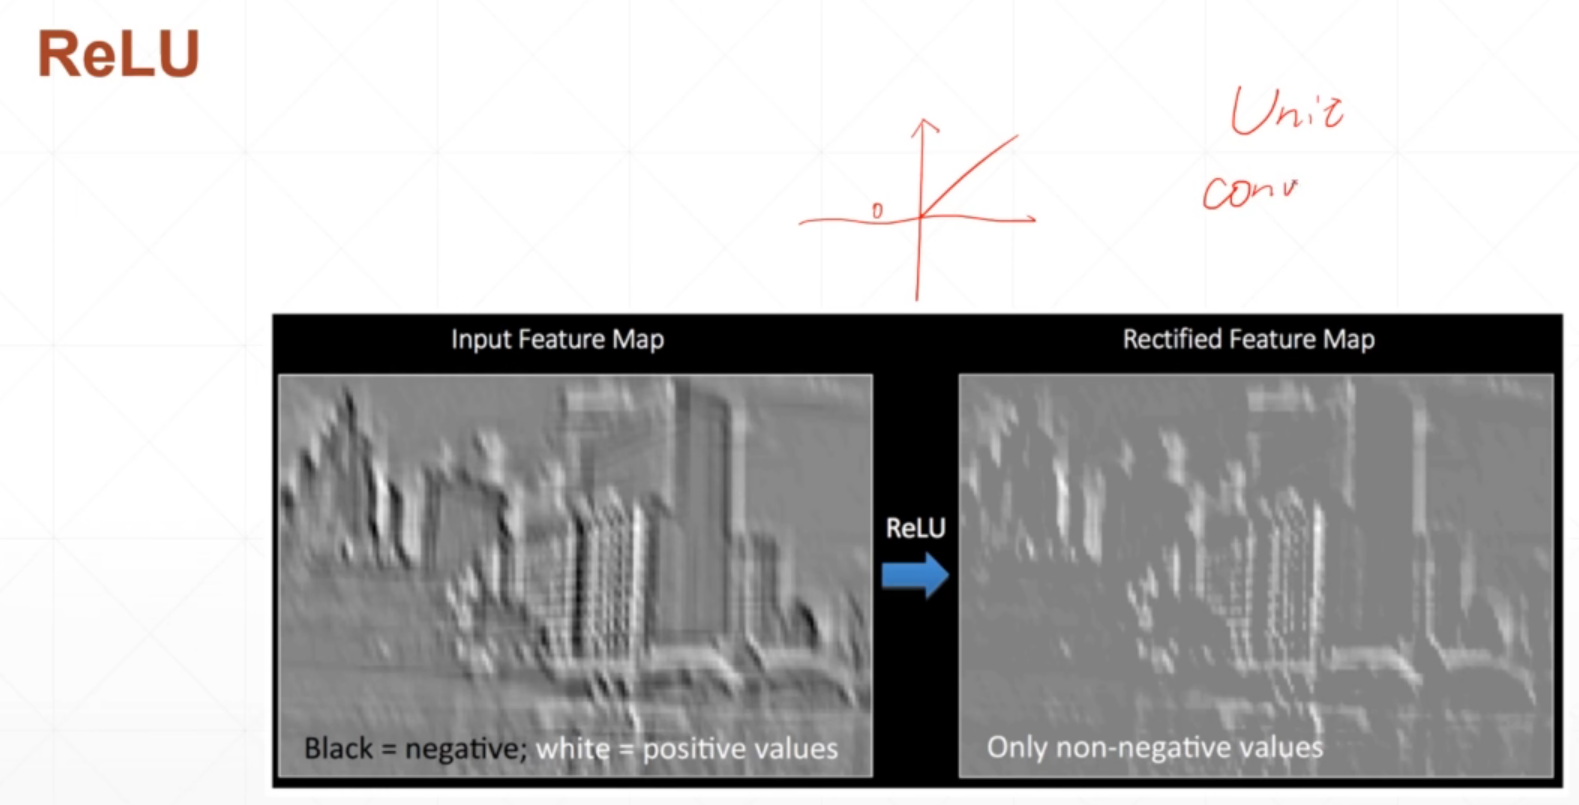

In [56]:
x.shape

torch.Size([1, 16, 7, 7])

In [58]:
layer = nn.ReLU(inplace =True)
out = layer(x)
out.size()

torch.Size([1, 16, 7, 7])

In [59]:
out = F.relu(x)
out.shape

torch.Size([1, 16, 7, 7])

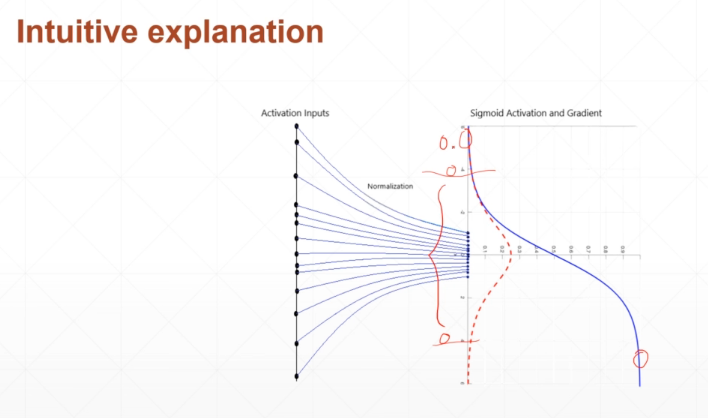

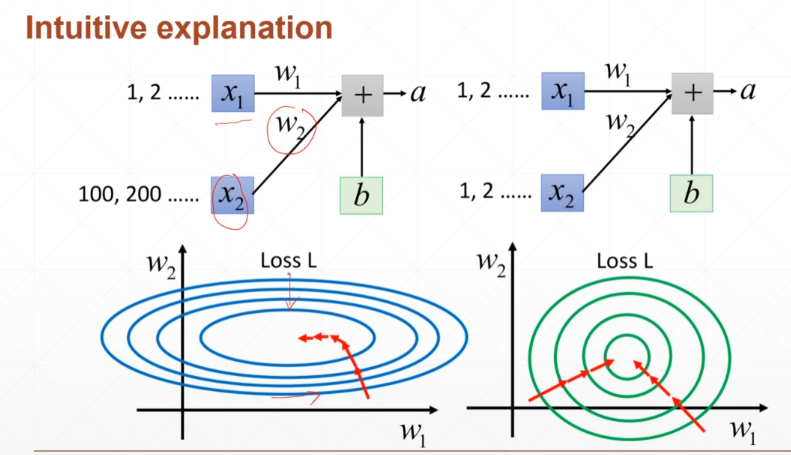

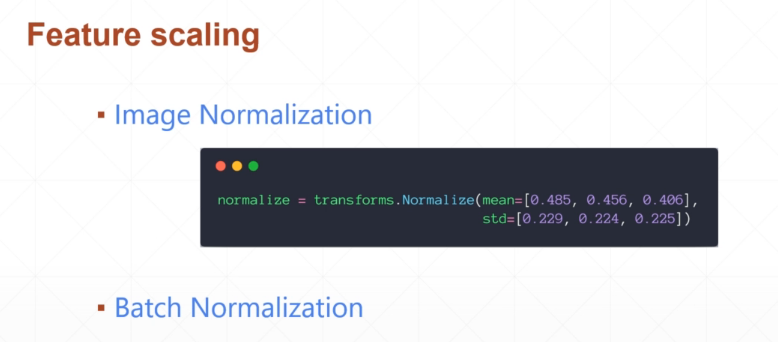

 这里主要是进行标准化处理

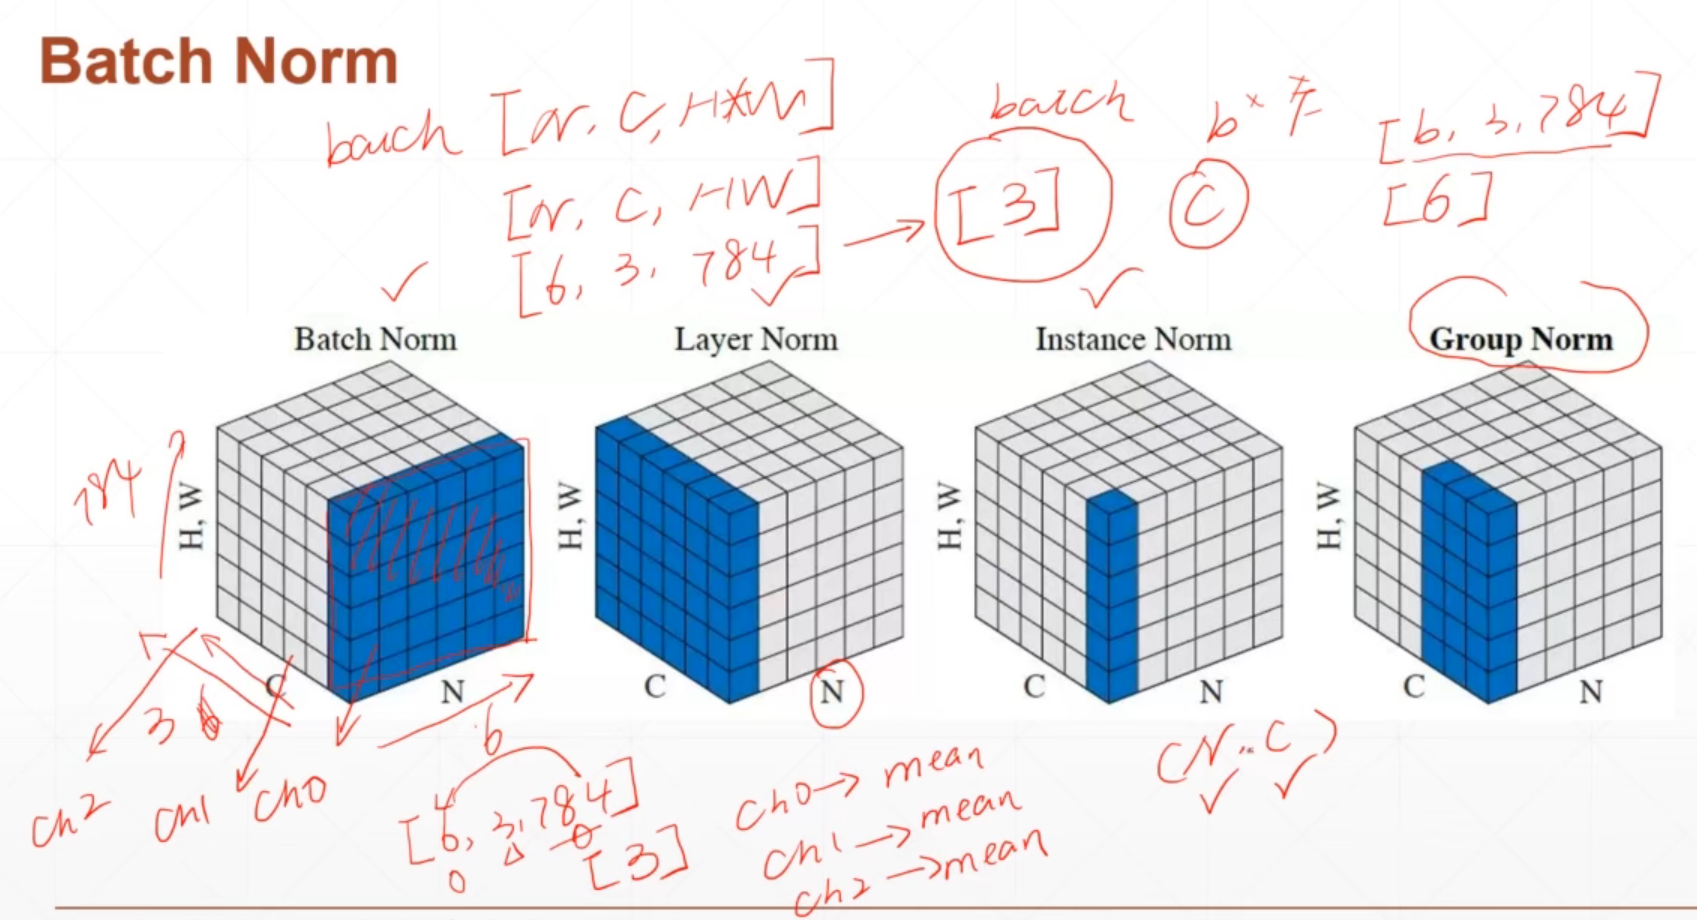

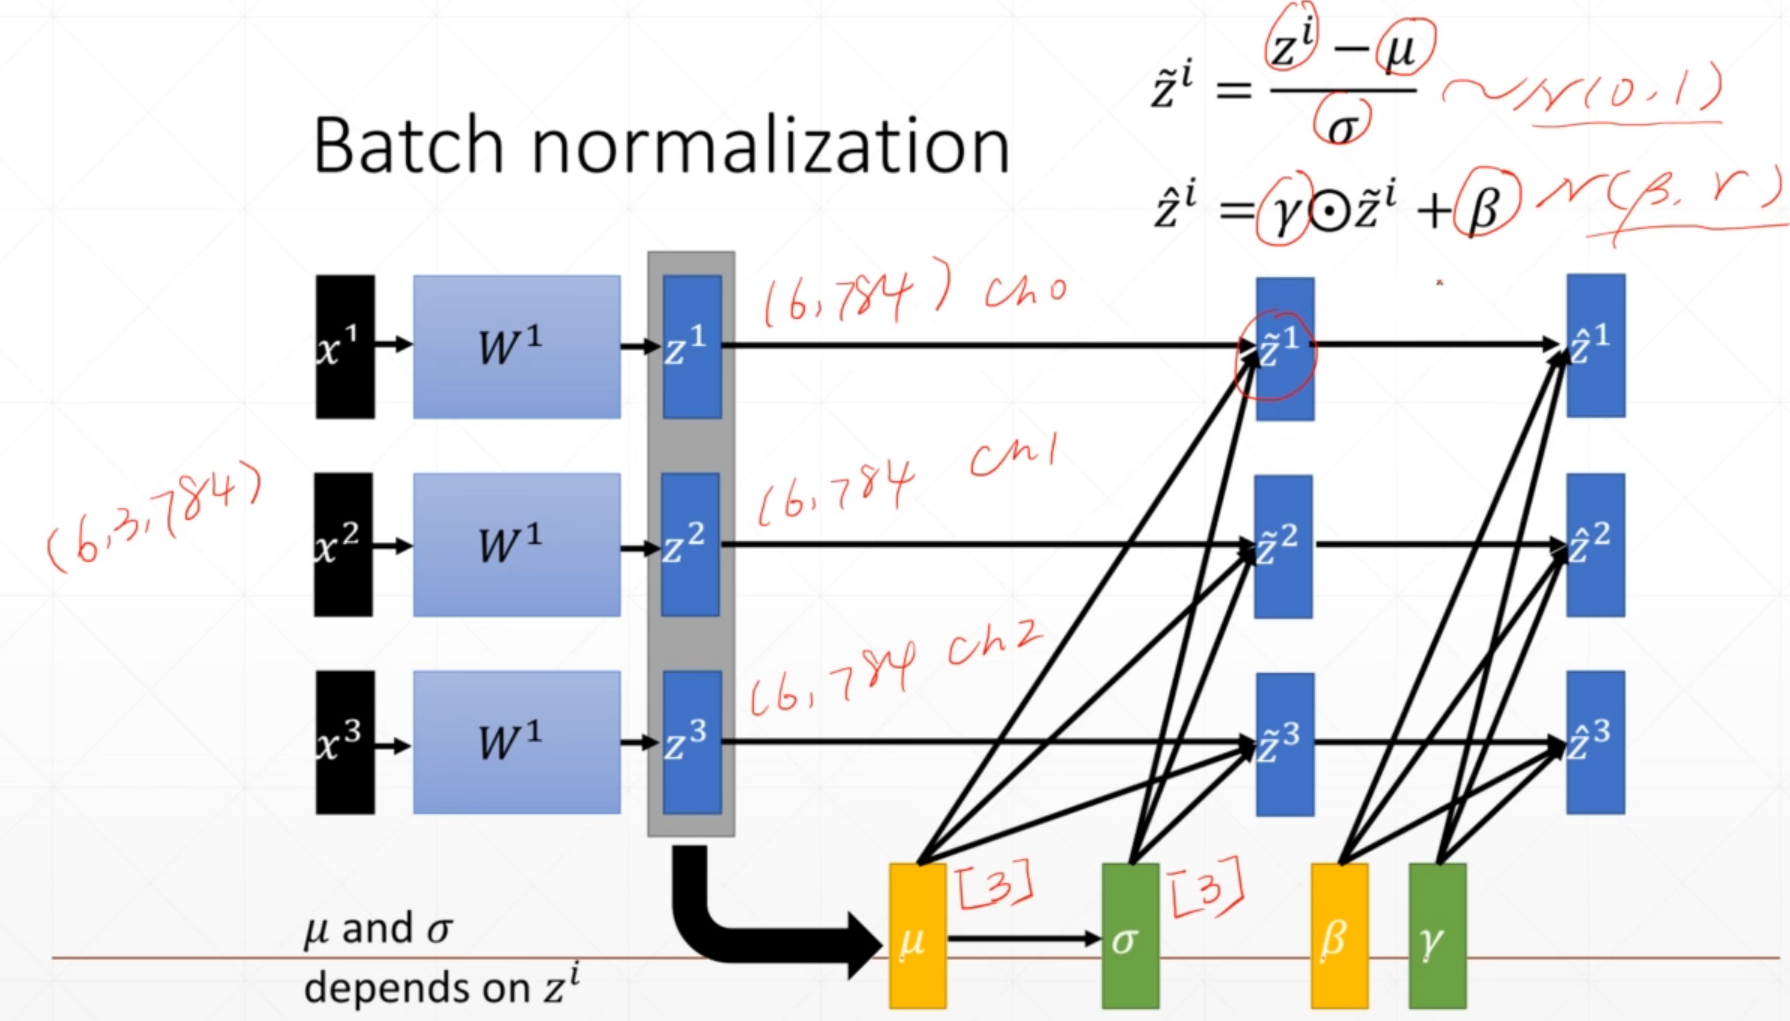

In [61]:
x = torch.rand(100,16,784)

In [62]:
layer = nn.BatchNorm1d(16)

In [63]:
out = layer(x)
out.size()

torch.Size([100, 16, 784])

In [64]:
layer.running_mean #每一个batch上的均值，即channel数

tensor([0.0501, 0.0500, 0.0502, 0.0500, 0.0500, 0.0501, 0.0500, 0.0500, 0.0501,
        0.0501, 0.0499, 0.0500, 0.0499, 0.0501, 0.0500, 0.0500])

In [68]:
layer.running_var #每一个batch上的方差，即channel数

tensor([0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083, 0.9083,
        0.9083, 0.9084, 0.9084, 0.9083, 0.9083, 0.9083, 0.9083])

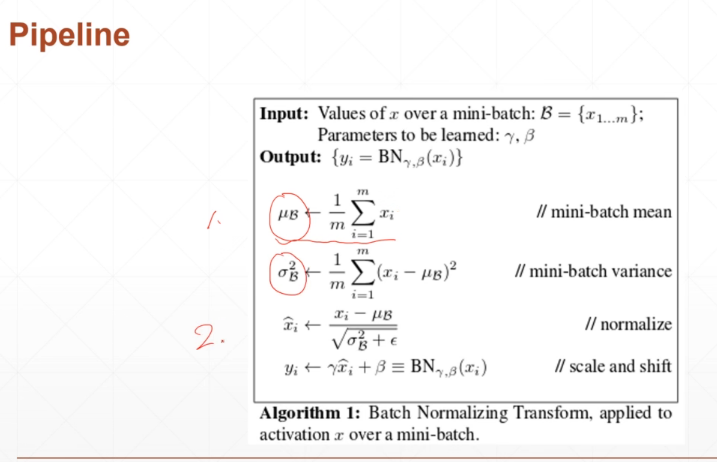

In [71]:
x  = torch.randn(1,16,7,7)

In [72]:
layer =nn.BatchNorm2d(16)

In [73]:
out = layer(x)
out.shape

torch.Size([1, 16, 7, 7])

In [74]:
layer.weight

Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       requires_grad=True)

In [75]:
layer.weight.shape

torch.Size([16])

In [76]:
layer.bias.shape

torch.Size([16])

In [77]:
vars(layer)

{'training': True,
 '_parameters': OrderedDict([('weight', Parameter containing:
               tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
                      requires_grad=True)),
              ('bias',
               Parameter containing:
               tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
                      requires_grad=True))]),
 '_buffers': OrderedDict([('running_mean',
               tensor([ 0.0234, -0.0053, -0.0148,  0.0109, -0.0091,  0.0057,  0.0160,  0.0094,
                        0.0226,  0.0206, -0.0227, -0.0081, -0.0126,  0.0157, -0.0002,  0.0161])),
              ('running_var',
               tensor([1.0041, 1.0058, 0.9824, 1.0165, 0.9929, 1.0320, 0.9855, 1.0015, 0.9900,
                       1.0065, 0.9802, 0.9974, 1.0077, 0.9693, 1.0028, 0.9770])),
              ('num_batches_tracked', tensor(1))]),
 '_non_persistent_buffers_set': set(),
 '_backward_hooks': OrderedDict(),
 '_is_full_backward_hook

In [78]:
layer.eval()

BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

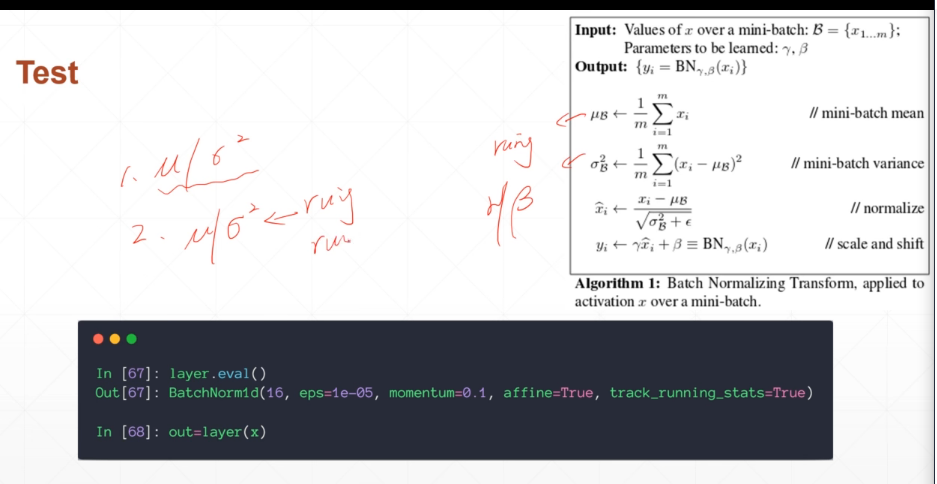

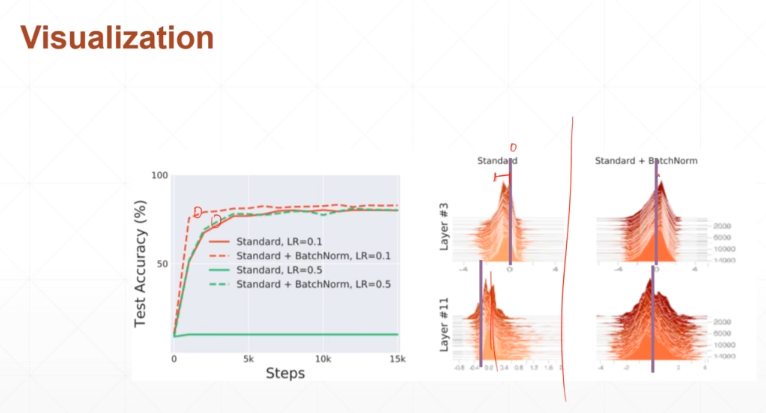

增加收敛速度

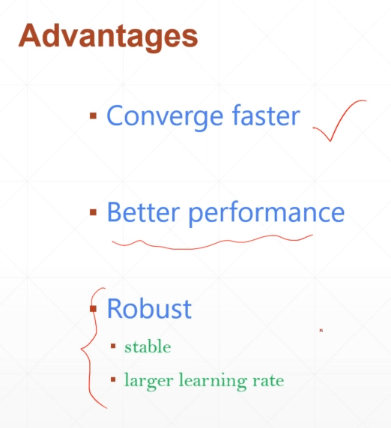